In [ ]:
import numpy as np
import random as rm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7201 - loss: 1.0672 - val_accuracy: 0.9010 - val_loss: 0.3624
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9012 - loss: 0.3557 - val_accuracy: 0.9170 - val_loss: 0.2981
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9161 - loss: 0.2988 - val_accuracy: 0.9266 - val_loss: 0.2633
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9230 - loss: 0.2707 - val_accuracy: 0.9320 - val_loss: 0.2412
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9342 - loss: 0.2354 - val_accuracy: 0.9377 - val_loss: 0.2214


In [ ]:
test_accu, test_loss=model.evaluate(x_test, y_test)
print("Accuracy=%.3f" %test_accu)
print("Loss=%.3f" %test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9275 - loss: 0.2568
Accuracy=0.221
Loss=0.938


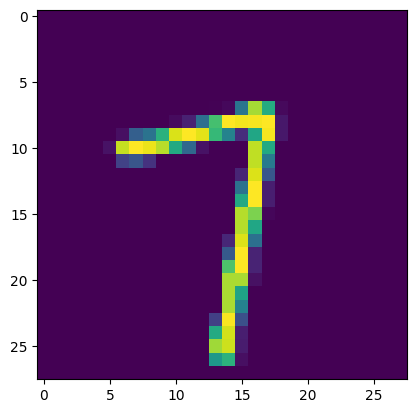

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


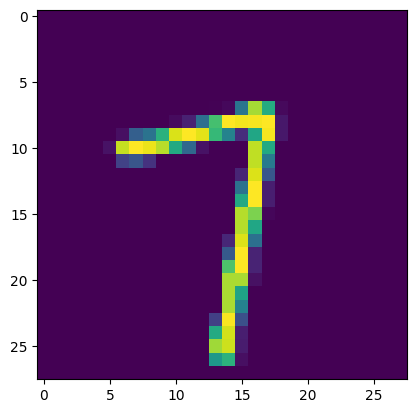

Predicted Value:  [1.2968422e-04 1.2791136e-03 1.8248083e-03 2.1195761e-03 1.4734981e-03
 2.3210491e-03 5.7161407e-05 9.2095220e-01 1.4087975e-03 6.8434164e-02]


In [ ]:
n=rm.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print("Predicted Value: ", predicted_value[n])

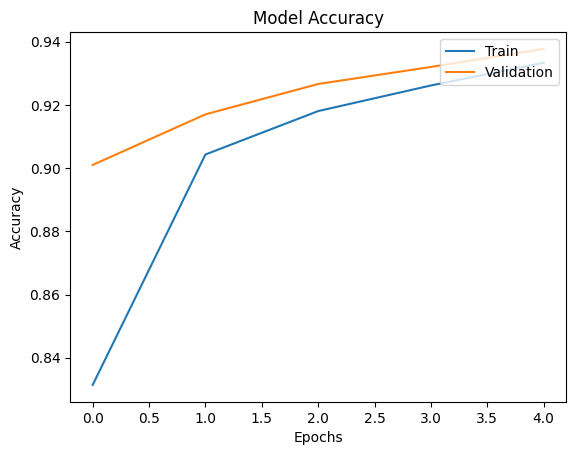

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

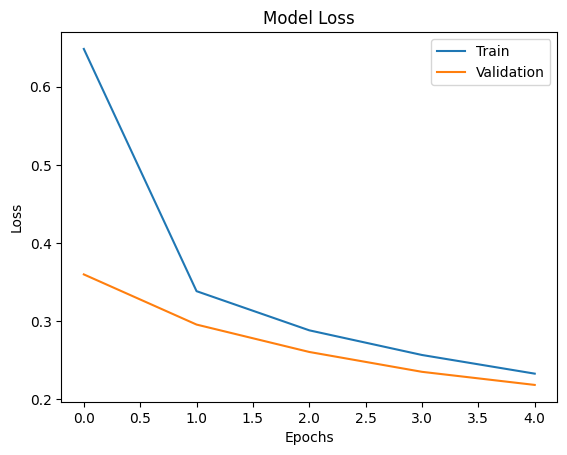

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()